<h1>Predict Probability of COVID 19</h1>

<h4>This is the training script to train and analyse various algorithms for COVID probability of infection prediciton.</h4>

In [39]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
dat=pd.read_excel(r'Train_dataset.xlsx')

In [41]:
dat.shape

(10714, 28)

In [42]:
dat.iloc[:,9:]

,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,8,2,None,42,4,<400,Normal,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,8,2,Coronary Heart Disease,49,6,<300,Elevated,352.0,140.0,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [43]:
# NEEDED
# Label Encoding
dat["Region"] = dat["Region"].astype('category').cat.codes
dat["Gender"] = dat["Gender"].astype('category').cat.codes
dat["Designation"] = dat["Designation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["Mode_transport"] = dat["Mode_transport"].astype('category').cat.codes
dat["Occupation"] = dat["Occupation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["comorbidity"] = dat["comorbidity"].astype('category').cat.codes
dat["Pulmonary score"] = dat["Pulmonary score"].astype('category').cat.codes
dat["cardiological pressure"] = dat["cardiological pressure"].astype('category').cat.codes


In [44]:
# Removing unnecessary fields
dat=dat.drop(["Name","Insurance", "salary", "people_ID"],  axis=1)

In [45]:
dat.isnull().sum()

Region                       0
Gender                       0
Designation                  0
Married                      0
Children                   311
Occupation                   0
Mode_transport               0
cases/1M                     0
Deaths/1M                    0
comorbidity                  0
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure       0
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [48]:
# Missing value handling using mean and forward fill methods
dat['Children']=dat['Children'].fillna(int(np.mean(dat['Children'])))
dat['Diuresis']=dat['Diuresis'].fillna(int(np.mean(dat['Diuresis'])))
dat['d-dimer']=dat['d-dimer'].fillna(int(np.mean(dat['d-dimer'])))
dat['Heart rate']=dat['Heart rate'].fillna(int(np.mean(dat['Heart rate'])))
dat['Platelets']=dat['Platelets'].fillna(int(np.mean(dat['Platelets'])))
dat['HDL cholesterol']=dat['HDL cholesterol'].fillna(int(np.mean(dat['HDL cholesterol'])))
dat['HBB']=dat['HBB'].fillna(int(np.mean(dat['HBB'])))
dat['FT/month']=dat['FT/month'].fillna(int(np.mean(dat['FT/month'])))
dat['comorbidity'].fillna('ffill', inplace=True)
dat['cardiological pressure'].fillna('ffill', inplace=True)

In [49]:
# Training data 
y_train= dat.iloc[:,-1]
x_train= dat.iloc[:,9:].drop(["Infect_Prob"], axis=1)

In [50]:
# (x-mu / sigma) scaling
from sklearn import preprocessing
sclr = preprocessing.StandardScaler()
x_scaled = sclr.fit_transform(x_train)
dat_x_train = pd.DataFrame(x_scaled)

In [53]:
# To check the normalised data
# dat_x_train

In [54]:
# PCA
data_reduced=dat[:1000]
x_train_reduced=x_train[:1000]
ncomp=6
pca_cov = PCA(n_components=ncomp)
principalComponents = pca_cov.fit_transform(x_train)

In [55]:
# Principal components as input data
principaldf=pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4', '5', '6'])
#                           ,'principal component 3','principal component 4'])

In [56]:
print('Explained variation per principal component: {}'.format(pca_cov.explained_variance_ratio_))


Explained variation per principal component: [0.55962616 0.18990593 0.10700751 0.09964971 0.01466063 0.01237666]


In [60]:
y_train.values
criteria = [y_train.between(0, 33), y_train.between(33, 66), y_train.between(66, 100)]
values = ['Low', 'Mid', 'High']
y_categories = np.select(criteria, values, 0)
dat['y_category']=y_categories
dat['y_category']=dat['y_category'].astype('category').cat.codes
dat

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,y_category
0,1,0,1,1,1.0,4,1,2,0,2,...,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
1,1,0,1,1,2.0,4,2,2,0,1,...,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880,2
2,1,0,1,0,1.0,1,1,2,0,3,...,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,0
3,1,0,1,1,1.0,3,0,2,0,0,...,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,1,0,1,0,2.0,6,0,2,0,1,...,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,0,2.0,0,0,8,2,1,...,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760,2
10710,0,1,0,1,0.0,6,0,8,2,3,...,102.0,134.0,211.0,65.0,47.0,35,7,1.0,47.148663,2
10711,0,1,0,1,0.0,2,1,8,2,1,...,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533,2
10712,0,1,0,1,1.0,5,2,8,2,0,...,140.0,110.0,253.0,56.0,70.0,28,5,1.0,53.803565,2


In [70]:
# Generating correlation matrix
dat_corr= dat.drop(['y_category', 'Infect_Prob'], axis=1)
dat_med=dat_corr[dat_corr.columns[-14:]]
cm=dat_corr.corr(method='kendall')
cm_med=dat_med.corr()

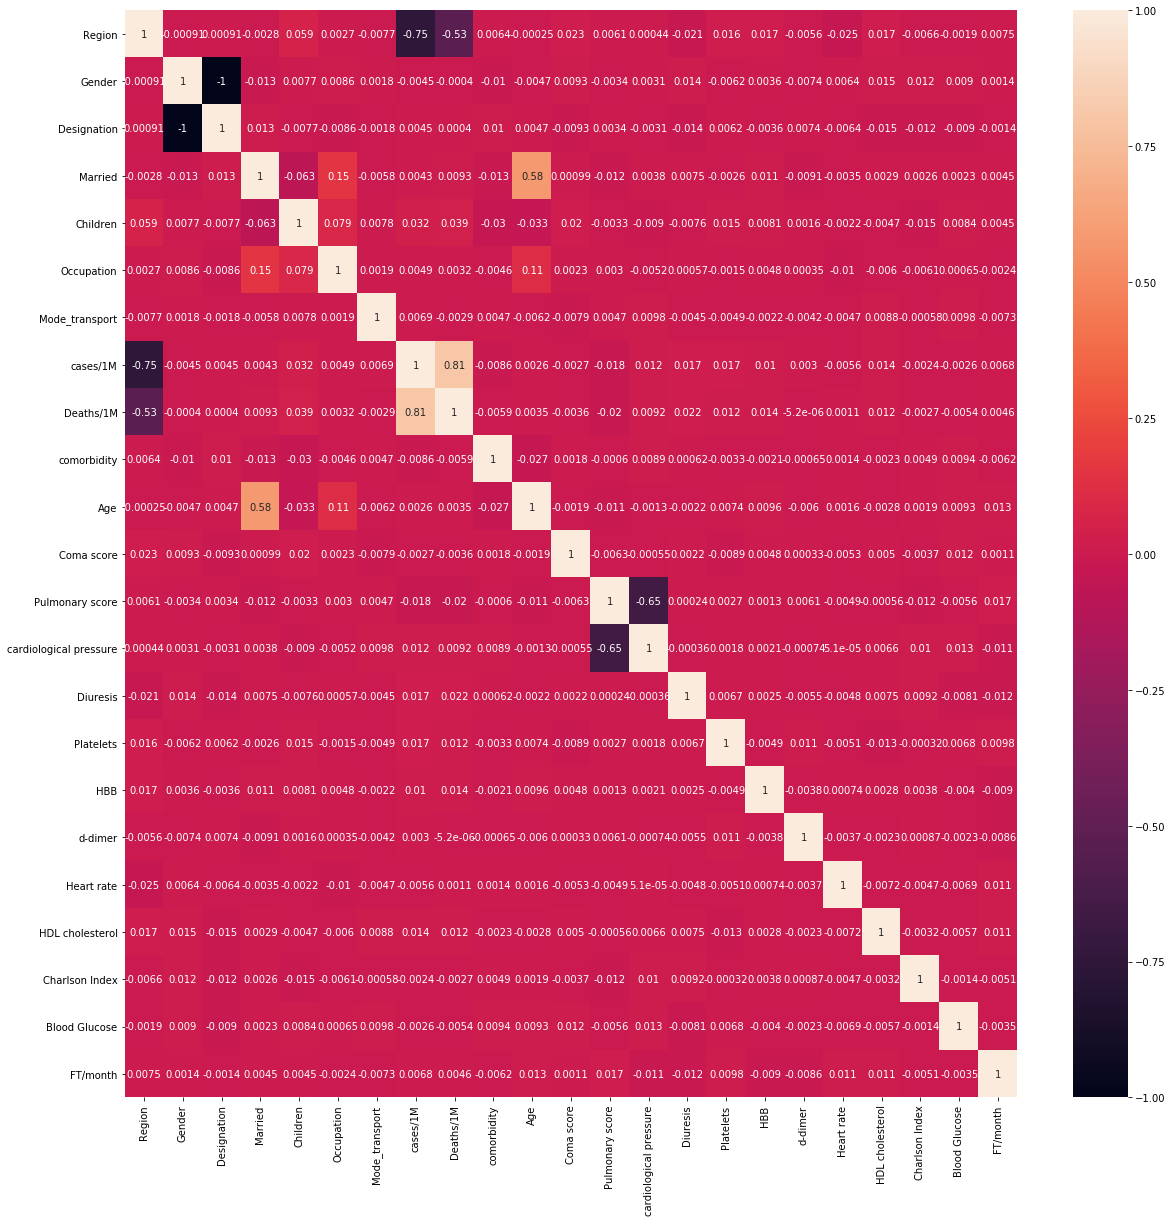

In [71]:
# Visualising correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(cm, annot=True)

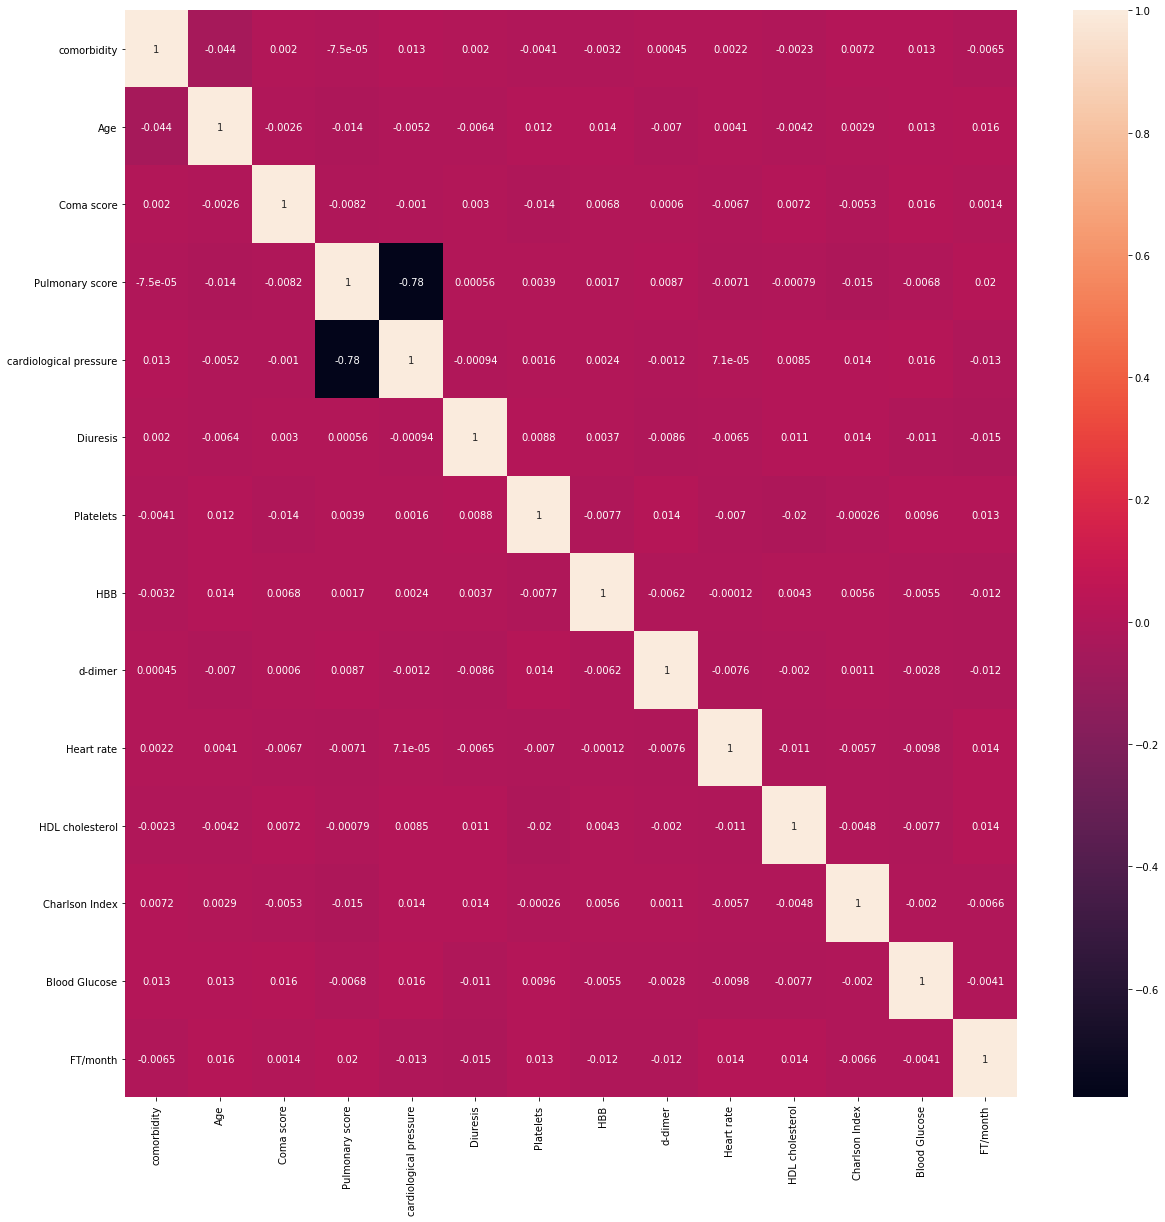

In [72]:
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(cm_med, annot=True)

In [73]:
X=principaldf.values
y=y_train.values

In [74]:
# From the understanding that medical data is highly correlated devloping a model for the subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)


In [75]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=0.0005, gamma=1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [76]:
svr_rbf.fit(X_train, y_train)

SVR(C=0.0005, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
# Obtaining 0 r2 score 
from sklearn.metrics import r2_score
pred=svr_rbf.predict(X_test)
print(r2_score(y_test,pred))

-0.08352134428531355


<h4> Rejecting SVR due to its very low and negative R2 Score for regression </h4>

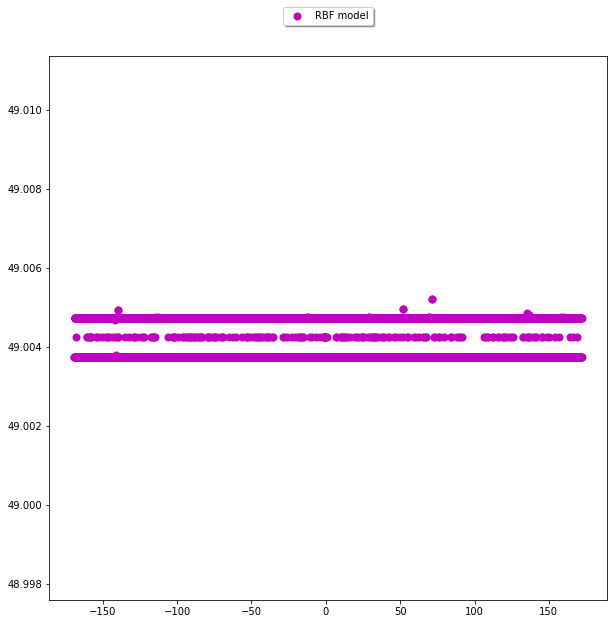

In [81]:
lw = 2
kernel_label = 'RBF'
model_color = 'm'
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], svr_rbf.predict(X_train), color=model_color, lw=lw,
                  label='{} model'.format(kernel_label))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [91]:
# Using only 1st principal component
X=principaldf.values
y_tr= dat.iloc[:,-2]
y=y_tr.values
print(X.shape)
print(y.shape)
print(y)

(10714, 6)
(10714,)
[49.13500977 51.14788025 73.224      ... 47.70853342 53.80356494
 68.3424    ]


In [92]:
# From the understanding that medical data is highly correlated devloping a model for the subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [124]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SGDClassifier(max_iter=1000000,loss='perceptron',eta0=0.000000001,tol=1e-4, learning_rate='constant', verbose=True, alpha=0.16))

In [125]:
# Using only 1st principal component and converting to classificaton problem
X=principaldf.values
y= dat.iloc[:,-1].values
print(X)
print(y)

[[ 162.64427912   23.92662737   27.82794116  -72.44810774  -25.88120496
     6.61994205]
 [  -1.09109159   61.04118584  -57.45023992  -21.38898702  -22.33312191
    13.88578348]
 [ 137.81034895  -20.52875411   52.84294401  -47.44672551   23.19607367
     2.70847595]
 ...
 [-101.68312729  -34.70346504  -25.03714185  -19.65905038  -16.9564653
    12.20141531]
 [  73.60919136    6.7508834    11.0546512   -55.22092066   -6.17060686
   -19.19343033]
 [ -97.44754521  -19.10493195   77.42498537    6.78659373   25.32132648
     7.61129953]]
[2 2 0 ... 2 2 0]


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=101)
X_train=X_train
y_train=y_train.reshape(-1, 1)
print(X_train.shape)

(8571, 6)


In [127]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000003, T: 8571, Avg. loss: 0.000003
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 6, Bias: -0.000005, T: 17142, Avg. loss: 0.000002
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 6, Bias: -0.000006, T: 25713, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 6, Bias: -0.000007, T: 34284, Avg. loss: 0.000001
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 6, Bias: -0.000008, T: 42855, Avg. loss: 0.000001
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 6, Bias: -0.000009, T: 51426, Avg. loss: 0.000001
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000003, T: 8571, Avg. loss: 0.000003
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 6, Bias: -0.000005, T: 17142, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 6, Bias: -0.0000

/home/samhar25/Conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Pipeline(memory=None,
         steps=[('sgdclassifier',
                 SGDClassifier(alpha=0.16, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=1e-09,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='perceptron',
                               max_iter=1000000, n_iter_no_change=5,
                               n_jobs=None, penalty='l2', power_t=0.5,
                               random_state=None, shuffle=True, tol=0.0001,
                               validation_fraction=0.1, verbose=True,
                               warm_start=False))],
         verbose=False)

In [128]:
pred= clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test.reshape(-1,1))

In [129]:
accuracy

0.9076061595893608

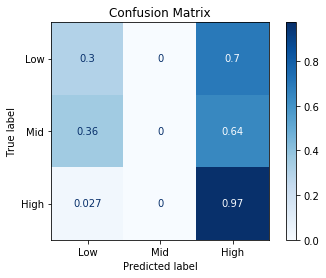

In [150]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
class_names=['']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

disp = plot_confusion_matrix(clf, X_test, y_test.reshape(-1,1),display_labels=['Low','Mid','High'],cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [143]:
# using a random forest classifier (can be any classifier)
from sklearn.ensemble import RandomForestClassifier as rf
clf2 = rf(n_estimators=14)
clf2.fit(X_train, y_train)

/home/samhar25/Conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
pred= clf2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(pred, y_test.reshape(-1,1))

In [145]:
accuracy2

0.8959402706486235

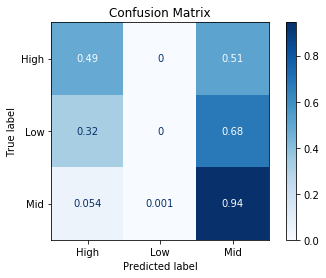

In [149]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf2, X_test, y_test.reshape(-1,1),display_labels=['High','Low','Mid'],cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [147]:
from sklearn.externals import joblib
joblib.dump(clf2, 'model_sar_5.pkl')

['model_sar_5.pkl']

In [148]:
labels=['High','Low','Mid']